<a href="https://colab.research.google.com/github/AndreySuavita/AG1-Visualizac-on/blob/master/Actividad_Guiada_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nombre: Andrey Fernando Suavita Losada
Google Colab: https://colab.research.google.com/drive/1YyYrg4CEoR7vbYjL28ItB84paJ2wIzX-?usp=sharing

In [1]:
#Importamos modulos

import pandas as pd
import io
import requests
import seaborn as sns
import timeit
import matplotlib.pyplot as plt

In [2]:
#Cargamos el data set de los pasajeros del Titanic

url="https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv"

s=requests.get(url).content

titanic=pd.read_csv(io.StringIO(s.decode('utf-8')))

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [4]:
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
titanic.rename(columns={'fare': 'tarifa'},inplace=True)

In [6]:
titanic.rename(columns={'class': 'clase'},inplace=True)

In [8]:
#primera forma
def is_old_func(row):

  return row['age'] > 60

titanic['is_old'] = titanic.apply(is_old_func, axis='columns')

In [9]:
#segunda forma
titanic.eval ( ' is_baby = age< 15 ' , inplace = True)

In [10]:
#Consulta con condiciones

titanic[(
  titanic.sex == 'female')

  & (titanic['clase'].isin(['First', 'Third']))

  & (titanic.age > 45 )

  & (titanic.survived == 0)

]

,survived,pclass,sex,age,sibsp,parch,tarifa,embarked,clase,who,adult_male,deck,embark_town,alive,alone,is_old,is_baby
132,0,3,female,47.0,1,0,14.5000,S,Third,woman,False,NaN,Southampton,no,False,False,False
177,0,1,female,50.0,0,0,28.7125,C,First,woman,False,C,Cherbourg,no,True,False,False
736,0,3,female,48.0,1,3,34.3750,S,Third,woman,False,NaN,Southampton,no,False,False,False


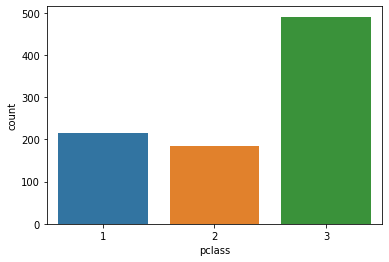

In [11]:
#Distribución de las clases

sns.countplot(x="pclass", data=titanic)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


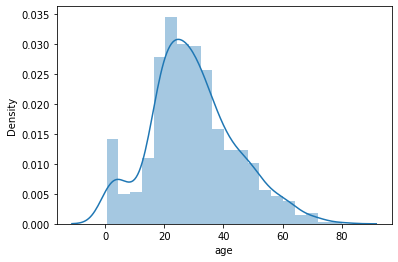

In [12]:
#Distribución de la edad(ege)

sns.distplot(titanic.age.dropna( ))

plt.show( )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


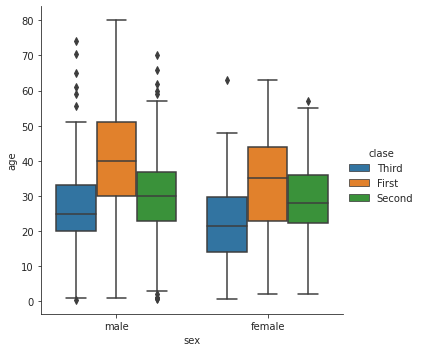

In [13]:
#BoxPlot de la edad por sexo y clase
with sns.axes_style(style='ticks'):
  ax = sns.catplot("sex", "age", "clase" ,data=titanic, kind="box")

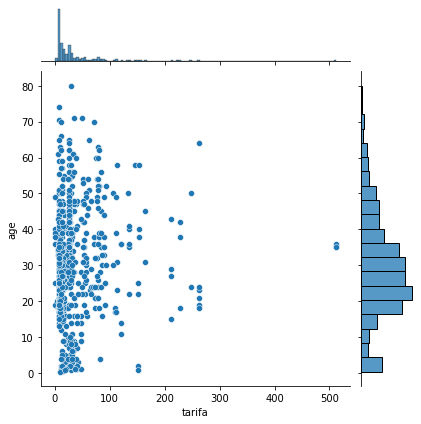

In [15]:
#Distribución cruzada de Edad y Tarifa

sns.jointplot(x='tarifa',y='age',data=titanic)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

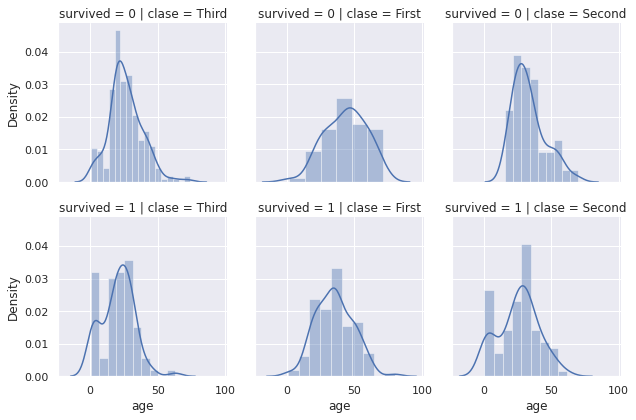

In [16]:
#Cambiamos el font
sns.set(font_scale=1)
#FacetGrid - Construir una matriz de gráficos
g = sns.FacetGrid(titanic, row='survived',col='clase')
g.map(sns.distplot, "age")
plt.show()

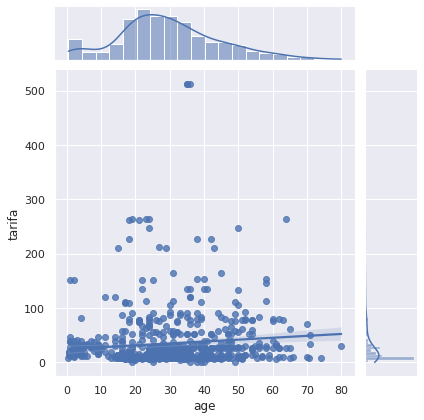

In [18]:
#Diagrama de dispersion con Distribucion de cadavariable: fare(precio)/age(edad)
sns.jointplot(data=titanic, x='age', y='tarifa',
kind='reg', color='b')
plt.show()